In [2]:
lfs=require 'lfs'
if string.find(lfs.currentdir(), 'visualization') then
    lfs.chdir('../')
end

In [5]:
require 'gnuplot'
require 'utils.MnistManager'
require 'models.GmmVae'
require 'nnutils.init'
require 'optim'
require 'cunn'
require 'image'
Plot = require 'itorch.Plot'
cmd = {h_size = 400, z_size = 1}

In [6]:
N = 50
data = MnistManager(50):cuda()
saved = torch.load('save/GmmVae.t7')
vae = saved.vae

# Image Reconstruction

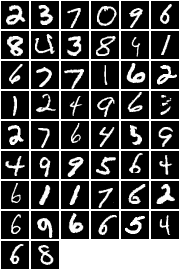

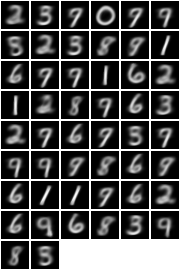

In [7]:
data:shuffle()
input = data:next()[1]
mask = input:clone():zero()
pmulv, mulv, recon = unpack(vae.model:forward({mask, input}))
-- original image
itorch.image(input:reshape(N, 1, 28, 28))
-- reconstructed image
itorch.image(recon:reshape(N, 1, 28, 28))

# Encoding Distribution

In [8]:
data:shuffle(1000)
input = data:next()[1]
mask = input:clone():zero()
pmulv, mulv, recon = unpack(vae.model:forward({mask,input}))
--     plt = Plot()
--     plt:circle(mu[{{},1}], mu[{{},2}], '#00F0F0')
--     plt:title("Distribution")
--     plt:draw()

In [9]:
plt = Plot()
mu = mulv[{{},1}]:clone():double()
plt:histogram(mu)
plt:title("hist")
plt:draw()

# Image Generation

In [18]:
sampler = nn.IndGmmSampler():cuda()

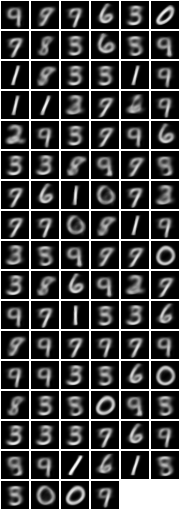

In [21]:
N = 100
data:shuffle(N)
input = data:next()[1]
mask = input:clone():zero()
pmulv = vae.prior:forward(mask)
code = sampler:forward(pmulv)
recon = vae.decoder:forward(code)
itorch.image(recon:reshape(N, 1, 28, 28))